# 0. setup

In [1]:
import pandas as pd
import numpy as np
from konlpy.tag import *
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from IPython.display import display
import matplotlib.font_manager as fm
from collections import Counter
import os

In [2]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
fm.fontManager.addfont(FONT_PATH)

print(font_name)
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 폰트 깨짐 해결
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


# 1.EDA

In [69]:
label_kor2eng = {
    '행복' : 'happiness',
    '놀람' : 'surprise',
    '분노' : 'anger',
    '공포' : 'fear',
    '혐오' : 'disgust',
    '슬픔' : 'sadness',
    '중립' : 'neutralism'
}

LABELS = set(label_kor2eng.values())

COL_NAME = ['text', 'label']

In [70]:
df = pd.read_excel("한국어_단발성_대화_데이터셋.xlsx")

In [71]:
df.head()

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,공포,5468
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,NaN,NaN,NaN,놀람,5898.0
1,그냥 내 느낌일뿐겠지?,공포,NaN,NaN,NaN,분노,5665.0
2,아직너무초기라서 그런거죠?,공포,NaN,NaN,NaN,슬픔,5267.0
3,유치원버스 사고 낫다던데,공포,NaN,NaN,NaN,중립,4830.0
4,근데 원래이런거맞나요,공포,NaN,NaN,NaN,행복,6037.0


In [72]:
df.shape

(38594, 7)

In [73]:
# extract only necessary columns & rename values to eng

df = df[['Sentence', 'Emotion']]
df.columns = COL_NAME
df['label']  =df['label'].replace(label_kor2eng)

In [74]:
# duplicated ?

print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

66
0


In [75]:
# missing cells
df.isna().sum()

text     0
label    0
dtype: int64

happiness     6005
surprise      5891
anger         5663
fear          5461
disgust       5428
sadness       5252
neutralism    4828
Name: label, dtype: int64

----------------------------------------------------------------------------------------------------


happiness     0.155861
surprise      0.152902
anger         0.146984
fear          0.141741
disgust       0.140885
sadness       0.136316
neutralism    0.125311
Name: label, dtype: float64

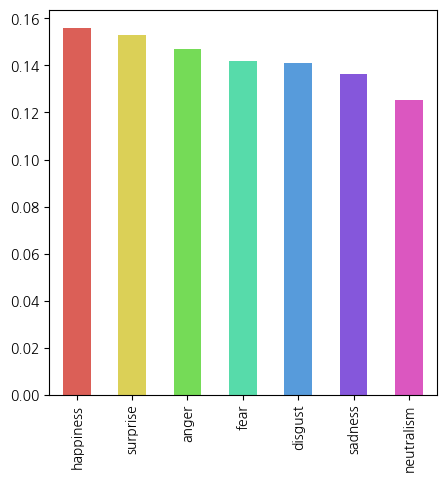

,text,label
count,38528,38528
unique,38509,7
top,그 잘나가는 드라마 사이에서 쇼핑왕루이한테도 발린 질투는 어떻게 상을 저리 받는거냐?,happiness
freq,2,6005


In [76]:
# label distribution

display(df['label'].value_counts())
print("-"*100)
norm_label = df['label'].value_counts(normalize=True)
display(norm_label)
norm_label.plot.bar(figsize=(5,5),color=sns.color_palette('hls',n_colors = len(norm_label)))
plt.show()
display(df.describe(include='all'))

In [77]:
# there are some texts duplicated with different labels

df['text'].duplicated().sum()

19

In [78]:
duplicated_sentences = df.loc[df['text'].duplicated(), 'text'].values

In [83]:
# manually label needed

# 이게 말이 되요? > surprise
df.loc[df['text']==duplicated_sentences[0], 'label'] = 'surprise'

In [84]:
# 번호바꾸는 남자는 무슨심리인가요? > anger
df.loc[df['text']==duplicated_sentences[1], 'label'] = 'anger'

In [85]:
# 방법이 없을까요? > neutralism
df.loc[df['text']==duplicated_sentences[2], 'label'] = 'neutralism'

In [86]:
# 너무 단호해서 어찌할바를 모르겠어요; > surprise (당황)
df.loc[df['text']==duplicated_sentences[3], 'label'] = 'surprise'

In [87]:
# 음...더 머리로 경영할 수 있을까??
df.loc[df['text']==duplicated_sentences[4], 'label'] = 'disgust'

In [88]:
# 안영미 저년도 속으론 철렁 하겠구만 ㅉㅉㅉㅉㅉㅉ > anger
df.loc[df['text']==duplicated_sentences[5], 'label'] = 'anger'

In [89]:
# 너무힘들어요 > sadness
df.loc[df['text']==duplicated_sentences[6], 'label'] = 'sadness'

In [90]:
# 아마 병원에서 정자를 다른사람것을 넣은거같아요..	> fear
df.loc[df['text']==duplicated_sentences[7], 'label'] = 'fear'

In [91]:
# 어떻게 해야 할까요? > sadness
df.loc[df['text']==duplicated_sentences[8], 'label'] = 'sadness'

In [92]:
# 고수님들 도와주세요	> sadness
df.loc[df['text']==duplicated_sentences[9], 'label'] = "sadness"

In [93]:
# 도와주세요	> sadness
df.loc[df['text']==duplicated_sentences[10], 'label'] = 'sadness'

In [94]:
# 내년에 잘 될까요	> sadness
df.loc[df['text']==duplicated_sentences[11], 'label'] = 'sadness'

In [95]:
# 사랑하는 사람 아이갖고 싶은게 정말 미친건가요?		> sadness
df.loc[df['text']==duplicated_sentences[12], 'label'] = 'sadness'

In [96]:
# 이게 그 요즘 유행하는 파국이란건가ㅎㅎㅎ	> surprise, sadness 중 surprise 택
df.loc[df['text']==duplicated_sentences[13], 'label'] = 'surprise'

In [98]:
# 언제 통계냈냐	> neutralism
df.loc[df['text']==duplicated_sentences[14], 'label'] = 'neutralism'

In [100]:
# 넘 재미남ㅠㅠ 이민호 넘 존잘에 설레는데 코믹한 연기도 넘 잘해ㅋㅋ		> happiness
df.loc[df['text']==duplicated_sentences[15], 'label'] = 'happiness'

In [102]:
# 우리 결혼했어요	> happiness
df.loc[df['text']==duplicated_sentences[16], 'label'] = 'happiness'

In [104]:
# 그 잘나가는 드라마 사이에서 쇼핑왕루이한테도 발린 질투는 어떻게 상을 저리 받는거냐? > disgust
df.loc[df['text']==duplicated_sentences[17], 'label'] = 'disgust'

In [106]:
# 제발 저런짓 좀 하지맙시다	 > anger
df.loc[df['text']==duplicated_sentences[18], 'label'] = 'anger'

In [110]:
df = df.drop_duplicates()

In [113]:
df.to_csv("cleaned_data.csv", index=False)